In [17]:
from ZV_functions import *
import tensorflow as tf
from matplotlib import pyplot as plt
import matplotlib
import pandas as pd
matplotlib.rcParams.update({'font.size': 16})
import tensorflow as tf
from keras.layers import Dense, Dropout, LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping
from keras.constraints import maxnorm
import keras.backend as k
from tensorflow.keras import regularizers


In [52]:
#base_dir='/eos/home-a/ahakimi/www/ZV_analysis'
base_dir='D:\\Travail\\ZV_analysis\\'
#year='2018_SR'
years=['2018_SR_var', '2017_SR_var', '2016_SR_var']
name='All_years_SR_allfeats'
cut='Boosted_SR'
vers=''


"""
if cut == 'Boosted_SR':
    features =[  'FatJet_pt', 'FatJeteta',
           'Zlep_1', 'Zlep_2', 
           'vbs_jet_pt1', 'vbs_jet_pt2',
           'vbs_jet_eta1', 'vbs_jet_eta2',
           'mjj_max', 'detajj_mjjmax', 'dphijj_mjjmax', 
            'njet', 'Zvjet', 'vbs_jet_qgl1', 'vbs_jet_qgl2', 'nbtag']
elif cut == 'Resolved_SR':
    features=['Lep_pt1', 'Lep_pt2', 'Lep_eta1',
           'Lep_eta2', 'mll',
           'Zlep_1', 'Zlep_2', 
           'vbs_jet_pt1', 'vbs_jet_pt2',
           'vbs_jet_eta1', 'vbs_jet_eta2',
           'V_jet_pt1', 'V_jet_pt2',
           'V_jet_eta1', 'V_jet_eta2',
           'mjj_max', 'detajj_mjjmax', 'dphijj_mjjmax',
           'V_jet_mass', 'njet', 'vbs_jet_qgl1', 'vbs_jet_qgl2',
             'V_jet_qgl1', 'V_jet_qgl2', 'nbtag']
"""


if cut == 'Boosted_SR':
    features =['Lep_pt1', 'Lep_pt2', 'Lep_eta1',
           'Lep_eta2', 'mll',
           'FatJet_pt', 'FatJeteta',
           'Zlep_1', 'Zlep_2', 
           'vbs_jet_pt1', 'vbs_jet_pt2',
           'vbs_jet_eta1', 'vbs_jet_eta2',
           'mjj_max', 'detajj_mjjmax', 'dphijj_mjjmax', 
            'njet', 'Zvjet', 'vbs_jet_qgl1', 'vbs_jet_qgl2', 'nbtag']
elif cut == 'Resolved_SR':
    features=['Lep_pt1', 'Lep_pt2', 'Lep_eta1',
           'Lep_eta2', 'mll',
           'Zlep_1', 'Zlep_2', 
           'vbs_jet_pt1', 'vbs_jet_pt2',
           'vbs_jet_eta1', 'vbs_jet_eta2',
           'V_jet_pt1', 'V_jet_pt2',
           'V_jet_eta1', 'V_jet_eta2',
           'mjj_max', 'detajj_mjjmax', 'dphijj_mjjmax',
           'V_jet_mass', 'njet', 'vbs_jet_qgl1', 'vbs_jet_qgl2',
             'V_jet_qgl1', 'V_jet_qgl2', 'nbtag']

"""

if cut == 'Boosted_SR':
    features =['pt1', 'pt2', 'eta1',
           'eta2', 'mll',
           'FatJet_pt', 'FatJeteta',
           'Zlep_1', 'Zlep_2', 
           'vbs_jet_pt1', 'vbs_jet_pt2',
           'vbs_jet_eta1', 'vbs_jet_eta2',
           'mjj_max', 'detajj_mjjmax']
elif cut == 'Resolved_SR':
    features=['pt1', 'pt2', 'eta1',
           'eta2', 'mll',
           'Zlep_1', 'Zlep_2', 
           'vbs_jet_pt1', 'vbs_jet_pt2',
           'vbs_jet_eta1', 'vbs_jet_eta2',
           'V_jet_pt1', 'V_jet_pt2',
           'V_jet_eta1', 'V_jet_eta2',
           'mjj_max', 'detajj_mjjmax',
           'V_jet_mass']
"""
    
data_dir=base_dir+name+'\\'+cut+'\\data'+vers
input_list= features
inputs= [cut+'_'+i for i in input_list]



In [53]:
X,y, variables_list=prep_data_multi(years, name,  cut, vers, base_dir) #

xlims=[(0,200),(0,150),(-3,3),(-3,3),(0,150),(0,5),(0,10),(0,900),(-5,5),(0,200),(0,1),(-1.5,1.5),(-1.5,1.5),(-1,1),
       (0,200),(0,200),(-5,5),(-5,5),
           (0,200),(0,100),(-5,5),(-5,5),(0,3000),(0,10),(0,4),(0,150)]

#plot_distrib(variables_list, xlims,base_dir, name, cut)
print('NUmber of events: {}, signal : {}, bkg: {}'.format(len(y),len(y[y['signal']==1]),len(y[y['signal']==0])))
print('SOW: {}, signal : {}, bkg: {}'.format(sum(y['weight_']),sum(y['weight_'][y['signal']==1]),sum(y['weight_'][y['signal']==0])))

2018_SR_var
2017_SR_var
2016_SR_var
Boosted_SR_Lep_pt1 145.5737 102.17893
Boosted_SR_Lep_pt2 59.821083 41.320534
Boosted_SR_Lep_eta1 -0.0040195463 1.2154824
Boosted_SR_Lep_eta2 -0.0029276605 1.2135019
Boosted_SR_mll 90.852165 4.0536857
Boosted_SR_Zepp_ll 0.71153575 0.5579527
Boosted_SR_nFatJet 2.182379648794819 0.7031008392038686
Boosted_SR_FatJet_pt 314.5571 124.91445
Boosted_SR_FatJeteta -0.005287413 1.01839
Boosted_SR_FatJet_softdropmass 85.81208 11.053013
Boosted_SR_FatJet_tau21 0.33093452 0.08028286
Boosted_SR_Zlep_1 -0.0012433032 0.5398862
Boosted_SR_Zlep_2 -0.0014391134 0.53787017
Boosted_SR_category 0.0 0.0
Boosted_SR_vbs_jet_pt1 218.51677 152.05814
Boosted_SR_vbs_jet_pt2 69.52596 52.14649
Boosted_SR_vbs_jet_eta1 0.004488807 1.7147709
Boosted_SR_vbs_jet_eta2 -0.0018824983 2.5568156
Boosted_SR_V_jet_pt1 -999.0 0.0
Boosted_SR_V_jet_pt2 -999.0 0.0
Boosted_SR_V_jet_eta1 -999.0 0.0
Boosted_SR_V_jet_eta2 -999.0 0.0
Boosted_SR_mjj_max 738.7682 542.0964
Boosted_SR_detajj_mjjmax 3.54913


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a D

In [54]:
for year in years:

    print('NUmber of events in {}: {}, signal : {}, bkg: {}'.format(year, len(y[y['year']==year]),len(y[(y['signal']==1) & (y['year']==year)] ),len(y[(y['signal']==0) & (y['year']==year)])))
    print('{} : SOW: {}, signal : {}, bkg: {}'.format(year,sum(y['weight_'][y['year']==year]),sum(y['weight_'][(y['signal']==1) & (y['year']==year)]),sum(y['weight_'][(y['signal']==0) & (y['year']==year)])))

NUmber of events in 2018_SR_var: 55464, signal : 5777, bkg: 49687
2018_SR_var : SOW: 1435.6405296894732, signal : 21.03458761393621, bkg: 1414.6059420755344
NUmber of events in 2017_SR_var: 49364, signal : 4461, bkg: 44903
2017_SR_var : SOW: 1010.5015490014183, signal : 12.14696778919873, bkg: 998.354581212223
NUmber of events in 2016_SR_var: 14988, signal : 472, bkg: 14516
2016_SR_var : SOW: 283.8317052728349, signal : 3.1515809468217544, bkg: 280.6801243260131


In [87]:
year=name


X= pd.DataFrame(np.load(data_dir+'\\X_{}_{}{}.npy'.format(year,cut,vers), allow_pickle=True), columns=variables_list)
X=X[inputs]
y= pd.DataFrame(np.load(data_dir+'\\y_{}_{}{}.npy'.format(year,cut,vers), allow_pickle=True), columns= ['year', 'signal','sample','group','weight_', 'w'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=42)

session_conf = tf.ConfigProto(intra_op_parallelism_threads=12, inter_op_parallelism_threads=12)
session_conf.gpu_options.allow_growth = True  # dynamically grow the memory 
tf.set_random_seed(1)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
k.tensorflow_backend.set_session(sess)

early_stop = 5  #number of epochs without gain before stoping
predictions_NN={}
target={}


#setting params
lr=0.0003 #to optimize
tfunc='relu'
dp=0.5 #to optimize
loss='binary_crossentropy'
sl1,sl2,sl3,sl4,sl5=80,80,0,0,0 # size of layers in nb of neurons #to optimize
l1=0
l2=0.05
epochs=200
batchsize=256

In [88]:
def build_dnn(base_dir, lr, l1, l2, dropout, sl1, sl2, sl3, sl4, sl5):
    from keras.layers.normalization import BatchNormalization

    SoB_thr=0.8
   
    
    NN_name='DNN_{}_{}_{}_{}_{}_lr{}_dp{}'.format(sl1,sl2,sl3,sl4,sl5,lr,dropout)
    reg=regularizers.L1L2(l1,l2)
    opt=Adam(lr=lr)
    #opt=SGD(lr=lr, momentum=0.99)


    DNN=Sequential()
    act_func=tfunc
    #,kernel_constraint=maxnorm(3)
    DNN.add(Dense(sl1,input_dim=len(inputs),activation=act_func,kernel_regularizer=reg))
    DNN.add(BatchNormalization())
    DNN.add(Dropout(rate=dropout))
    

    if sl2!=0:
        DNN.add(Dense(sl2,activation=act_func,kernel_regularizer=reg))
        DNN.add(BatchNormalization())
        DNN.add(Dropout(rate=dropout))
        
    if sl3!=0:
        DNN.add(Dense(sl3,activation=act_func,kernel_regularizer=reg))
        DNN.add(BatchNormalization())
        DNN.add(Dropout(rate=dropout))
        
    if sl4!=0:
        DNN.add(Dense(sl4,activation=act_func))
        DNN.add(BatchNormalization())
        DNN.add(Dropout(rate=dropout))
        
    if sl5!=0:
        DNN.add(Dense(sl5,activation=act_func))
        DNN.add(BatchNormalization())
        DNN.add(Dropout(rate=dropout))
        


    DNN.add(Dense(1,activation='sigmoid'))
    #DNN.add(BatchNormalization())
    #tp= tf.keras.metrics.TruePositives(thresholds =SoB_thr, name= 'tp')
    #fp= tf.keras.metrics.FalsePositives(thresholds =SoB_thr, name= 'fp')
    auc=tf.keras.metrics.AUC()
    DNN.compile(loss=loss,optimizer=opt ) #, metrics=[ auc]'auc [ auc, tp, fp] carefull: if metric, cannot be dumped
    
    return DNN, NN_name

In [89]:
#train dnn

DNN, NN_name=build_dnn(base_dir, lr, l1, l2, dp, sl1, sl2, sl3, sl4, sl5)
res_dir=base_dir+'\\'+year+'\\'+cut+'\\Res_{}'.format(NN_name)+vers
if not os.path.exists(res_dir):
    os.makedirs(res_dir)

es_callback = EarlyStopping(monitor='val_loss', patience=early_stop, restore_best_weights=True) 

history=DNN.fit(x=X_train, y=y_train['signal'].to_numpy(),
                sample_weight=y_train['w'].to_numpy(), epochs=epochs, batch_size=batchsize, 
                verbose=2, callbacks=[es_callback], 
                validation_data=(X_test, y_test['signal'].to_numpy(),y_test['w'].to_numpy()))

DNN.evaluate(X_test, y_test['signal'])

#print('\nTest accuracy:', test_acc)

predictions_NN= DNN.predict(X_test)
predictions_NN_train=DNN.predict(X_train)
DNN.save(res_dir+'\\model.h5')

Train on 95852 samples, validate on 23964 samples
Epoch 1/200
 - 4s - loss: 2.9955 - val_loss: 1.2203
Epoch 2/200
 - 2s - loss: 0.6430 - val_loss: 0.2924
Epoch 3/200
 - 2s - loss: 0.2001 - val_loss: 0.1372
Epoch 4/200
 - 2s - loss: 0.1233 - val_loss: 0.1091
Epoch 5/200
 - 2s - loss: 0.1071 - val_loss: 0.1021
Epoch 6/200
 - 2s - loss: 0.1028 - val_loss: 0.1005
Epoch 7/200
 - 2s - loss: 0.1008 - val_loss: 0.0977
Epoch 8/200
 - 2s - loss: 0.0998 - val_loss: 0.0984
Epoch 9/200
 - 2s - loss: 0.1000 - val_loss: 0.0982
Epoch 10/200
 - 2s - loss: 0.0993 - val_loss: 0.0980
Epoch 11/200
 - 2s - loss: 0.0989 - val_loss: 0.0976
Epoch 12/200
 - 2s - loss: 0.0993 - val_loss: 0.0990
Epoch 13/200
 - 2s - loss: 0.0990 - val_loss: 0.0972
Epoch 14/200
 - 2s - loss: 0.0986 - val_loss: 0.0969
Epoch 15/200
 - 2s - loss: 0.0985 - val_loss: 0.0977
Epoch 16/200
 - 2s - loss: 0.0989 - val_loss: 0.0972
Epoch 17/200
 - 2s - loss: 0.0982 - val_loss: 0.0979
Epoch 18/200
 - 2s - loss: 0.0985 - val_loss: 0.0975
Epoch

AUC Score (Test): 82.126033%
AUC Score (Test): 83.479322%


"\nepochs = len(history.history['val_tp'])\nx_axis = range(0, epochs)\nfig, ax = plt.subplots()\nax.plot(x_axis, (history.history['tp']/np.sqrt(history.history['fp'])), label='Train')\nax.plot(x_axis, (history.history['val_tp']/np.sqrt(history.history['val_fp'])), label='Test')\nax.legend()\nplt.ylabel('SoB')\nplt.xlabel('epoch')\nplt.draw()\nplt.savefig(res_dir+'\\{}{}_{}_NNSoB.png'.format(year,vers,cut))\n"

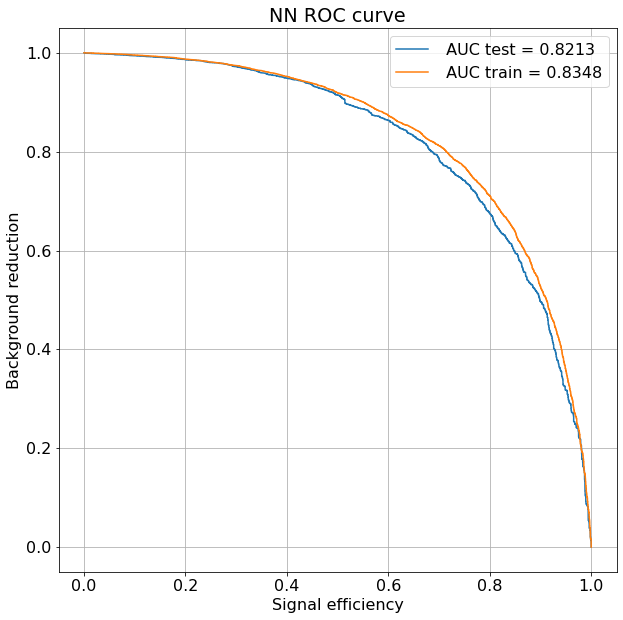

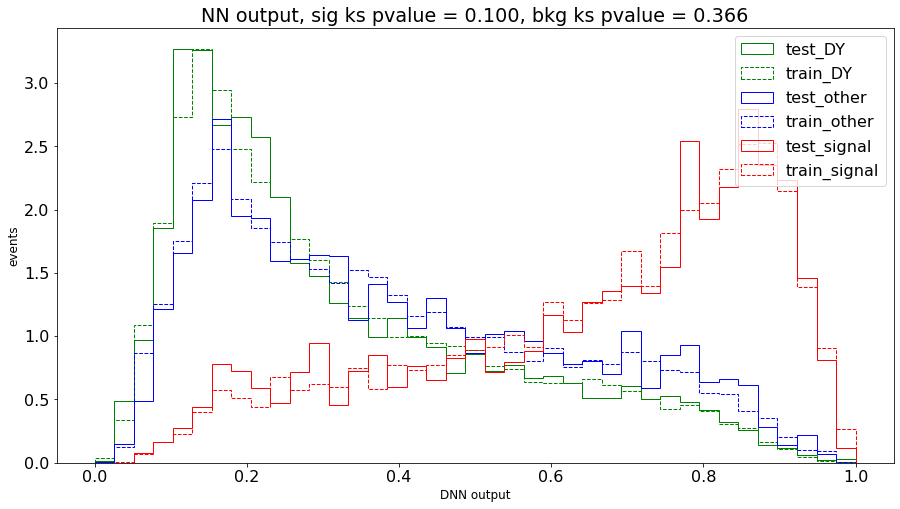

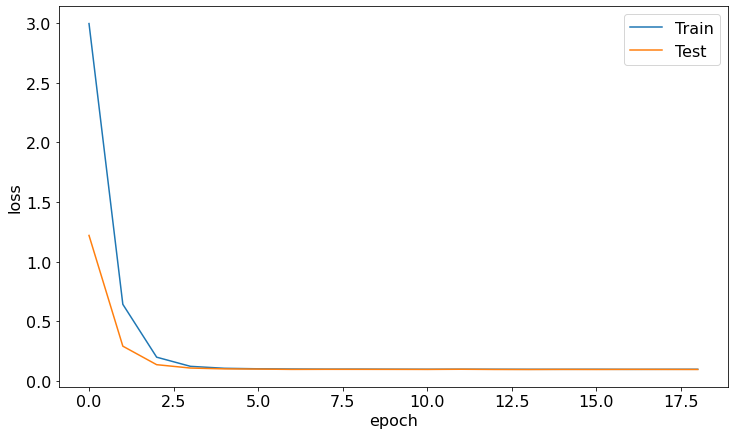

In [90]:
#plot results
from sklearn.metrics import auc, roc_curve
from keras.models import load_model
#model = load_model(res_dir+'\\model.h5')
model=DNN
predictions_NN= model.predict(X_test)
predictions_NN_train=model.predict(X_train)

#KS_test

from scipy import stats
ks_test_sig=stats.ks_2samp(predictions_NN[:,0][y_test['signal'] ==1],predictions_NN_train[:,0][y_train['signal'] ==1])
ks_test_bkg=stats.ks_2samp(predictions_NN[:,0][y_test['signal'] ==0],predictions_NN_train[:,0][y_train['signal'] ==0])

#plot AUC
plt.figure(figsize=(10,10))
fpr, tpr, threshold = roc_curve(y_test['signal'].astype('int32'),predictions_NN, pos_label=1, sample_weight=y_test['weight_'])
tpr.sort()
fpr.sort()
roc_auc =auc(fpr, tpr)
print ("AUC Score (Test): {:4%}".format(roc_auc))
plt.plot(tpr,(1-fpr), label =' AUC test = %0.4f' %(roc_auc))
fpr, tpr, threshold = roc_curve(y_train['signal'].astype('int32'),predictions_NN_train, pos_label=1, sample_weight=y_train['weight_'])
tpr.sort()
fpr.sort()
roc_auc =auc(fpr, tpr)
print ("AUC Score (Test): {:4%}".format(roc_auc))
plt.plot(tpr,(1-fpr), label =' AUC train = %0.4f' %(roc_auc))
#plt.xlim(0,0.3)
plt.xlabel('Signal efficiency')
plt.ylabel('Background reduction')
plt.title('NN ROC curve')
plt.grid()
plt.legend()
plt.savefig(res_dir+'\\{}{}_{}_NNROC.png'.format(year,vers,cut))

#plot NN ouput by sample
plt.figure(figsize=(15,8))
groups=['DY','other','signal']
color=['green','blue','red']
x=[]
nbins=40
for i,group in enumerate(groups):  
    plt.hist(predictions_NN[y_test['group']==group],bins=np.linspace(0,1,nbins), label='test_'+group, density=True, histtype='step', color=color[i], weights= y_test['weight_'][y_test['group']==group])
    plt.hist(predictions_NN_train[y_train['group']==group],bins=np.linspace(0,1,nbins), label='train_'+group, density=True, histtype='step', color=color[i], linestyle='dashed',weights= y_train['weight_'][y_train['group']==group])

plt.xlabel('DNN output',fontsize=12)
plt.ylabel('events',fontsize=12)
plt.title('NN output, sig ks pvalue = {:.3f}, bkg ks pvalue = {:.3f}'.format(ks_test_sig[1], ks_test_bkg[1]))
plt.legend()
plt.savefig(res_dir+'\\{}{}_{}_NNOutput_Trainvstest.png'.format(year,vers,cut))


#plot loss
plt.figure(figsize=(12,7))
epochs = len(history.history['val_loss'])
x_axis = range(0, epochs)
#fig, ax = plt.subplots()
plt.plot(x_axis, history.history['loss'], label='Train')
plt.plot(x_axis, history.history['val_loss'], label='Test')
plt.legend()
plt.ylabel('loss')
plt.xlabel('epoch')
plt.draw()
plt.savefig(res_dir+'\\{}{}_{}_NNloss.png'.format(year,vers,cut))
"""
plt.figure(figsize=(12,7))
epochs = len(history.history['val_auc'])
x_axis = range(0, epochs)
#fig, ax = plt.subplots()
plt.plot(x_axis, history.history['auc'], label='Train')
plt.plot(x_axis, history.history['val_auc'], label='Test')
plt.legend()
plt.ylabel('auc')
plt.xlabel('epoch')
plt.draw()
plt.savefig(res_dir+'\\{}{}_{}_NNauc.png'.format(year,vers,cut))
"""
#plot SoB
"""
epochs = len(history.history['val_tp'])
x_axis = range(0, epochs)
fig, ax = plt.subplots()
ax.plot(x_axis, (history.history['tp']/np.sqrt(history.history['fp'])), label='Train')
ax.plot(x_axis, (history.history['val_tp']/np.sqrt(history.history['val_fp'])), label='Test')
ax.legend()
plt.ylabel('SoB')
plt.xlabel('epoch')
plt.draw()
plt.savefig(res_dir+'\\{}{}_{}_NNSoB.png'.format(year,vers,cut))
"""


In [91]:
#predict every x epoch

DNN, NN_name=build_dnn(base_dir, lr, l1, l2, dp, sl1, sl2, sl3, sl4, sl5)
res_dir=base_dir+'\\'+year+'\\'+cut+'\\Res_{}'.format(NN_name)+vers
freq = 3
predictions_test={}
predictions_train={}

history={}
i=0
DNN, NN_name=build_dnn(base_dir, lr, l1, l2, dp, sl1, sl2, sl3, sl4, sl5)
history[i]=DNN.fit(x=X_train, y=y_train['signal'].to_numpy(),
                   sample_weight=y_train['w'].to_numpy(), epochs = freq, batch_size=batchsize, 
            verbose=2, validation_data=(X_test, y_test['signal'].to_numpy(),y_test['w'].to_numpy()))

predictions_test[i]=DNN.predict(X_test)
predictions_train[i]=DNN.predict(X_train)

for i in range (1, int(epochs/freq)):
    print("training {}/{}".format(i, int(epochs/freq)))
    history[i]=DNN.fit(x=X_train, y=y_train['signal'].to_numpy(),
                sample_weight=y_train['w'].to_numpy(), epochs = freq, batch_size=batchsize, 
                verbose=2, 
                validation_data=(X_test, y_test['signal'].to_numpy(),y_test['w'].to_numpy()))
    predictions_test[i]=DNN.predict(X_test)
    predictions_train[i]=DNN.predict(X_train)
   
    

Train on 95852 samples, validate on 23964 samples
Epoch 1/3
 - 4s - loss: 3.0105 - val_loss: 1.2330
Epoch 2/3
 - 2s - loss: 0.6548 - val_loss: 0.2959
Epoch 3/3
 - 2s - loss: 0.2052 - val_loss: 0.1380
training 1/6
Train on 95852 samples, validate on 23964 samples
Epoch 1/3
 - 2s - loss: 0.1257 - val_loss: 0.1108
Epoch 2/3
 - 2s - loss: 0.1080 - val_loss: 0.1019
Epoch 3/3
 - 2s - loss: 0.1023 - val_loss: 0.0988
training 2/6
Train on 95852 samples, validate on 23964 samples
Epoch 1/3
 - 2s - loss: 0.1006 - val_loss: 0.0983
Epoch 2/3
 - 2s - loss: 0.0996 - val_loss: 0.0983
Epoch 3/3
 - 3s - loss: 0.0995 - val_loss: 0.0983
training 3/6
Train on 95852 samples, validate on 23964 samples
Epoch 1/3
 - 2s - loss: 0.0996 - val_loss: 0.0981
Epoch 2/3
 - 2s - loss: 0.0988 - val_loss: 0.0991
Epoch 3/3
 - 2s - loss: 0.0990 - val_loss: 0.0988
training 4/6
Train on 95852 samples, validate on 23964 samples
Epoch 1/3
 - 2s - loss: 0.0993 - val_loss: 0.0974
Epoch 2/3
 - 2s - loss: 0.0989 - val_loss: 0.098

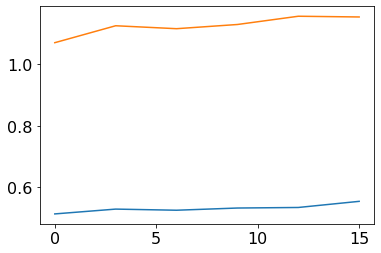

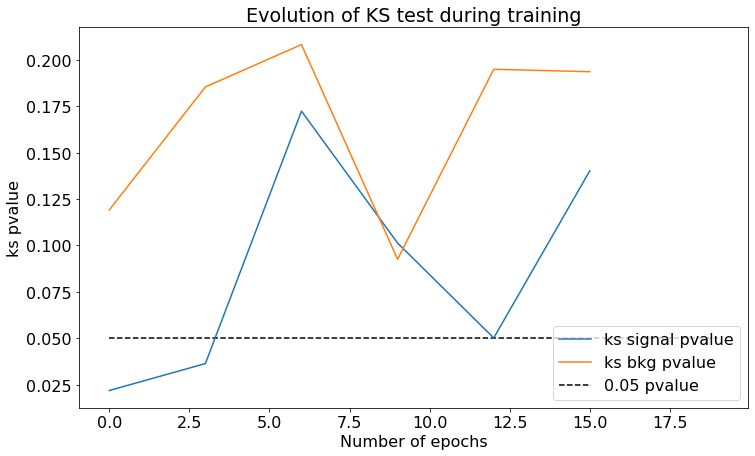

In [92]:
from scipy import stats
i = 0
ks_sig={}
ks_bkg={}
ks_sig[i]=stats.ks_2samp(predictions_test[i][:,0][y_test['signal'] ==1],predictions_train[i][:,0][y_train['signal'] ==1])[1]
ks_bkg[i]=stats.ks_2samp(predictions_test[i][:,0][y_test['signal'] ==0],predictions_train[i][:,0][y_train['signal'] ==0])[1]
S_test={}
B_test={}
S_train={}
B_train={}
co=0.8
S_test[i]=sum(y_test['weight_'][predictions_test[i][:,0]>=co][y_test['signal'][predictions_test[i][:,0]>=co] == 1])
S_train[i]=sum(y_train['weight_'][predictions_train[i][:,0]>=co][y_train['signal'][predictions_train[i][:,0]>=co] == 1])
B_test[i]=sum(y_test['weight_'][predictions_test[i][:,0]>=co][y_test['signal'][predictions_test[i][:,0]>=co] == 0])
B_train[i]=sum(y_train['weight_'][predictions_train[i][:,0]>=co][y_train['signal'][predictions_train[i][:,0]>=co] == 0])

for i in range (1, int(epochs/freq)):
    ks_sig[i]=stats.ks_2samp(predictions_test[i][:,0][y_test['signal'] ==1],predictions_train[i][:,0][y_train['signal'] ==1])[1]
    ks_bkg[i]=stats.ks_2samp(predictions_test[i][:,0][y_test['signal'] ==0],predictions_train[i][:,0][y_train['signal'] ==0])[1]
    S_test[i]=sum(y_test['weight_'][predictions_test[i][:,0]>=co][y_test['signal'][predictions_test[i][:,0]>=co] == 1])
    S_train[i]=sum(y_train['weight_'][predictions_train[i][:,0]>=co][y_train['signal'][predictions_train[i][:,0]>=co] == 1])
    B_test[i]=sum(y_test['weight_'][predictions_test[i][:,0]>=co][y_test['signal'][predictions_test[i][:,0]>=co] == 0])
    B_train[i]=sum(y_train['weight_'][predictions_train[i][:,0]>=co][y_train['signal'][predictions_train[i][:,0]>=co] == 0])


SoB_test=[]
SoB_train=[]
for i in range(0, len(S_test.values())):
    #print (S_test[i], B_test[i])
    SoB_test.append((S_test[i]/np.sqrt(B_test[i])))
    SoB_train.append((S_train[i]/np.sqrt(B_train[i])))
x=[i*freq for i in range(0, len(ks_sig))]
plt.plot(x, SoB_test)
plt.plot(x, SoB_train)
plt.savefig(res_dir+'\\{}{}_{}_SOB.png'.format(year,vers,cut))

plt.figure(figsize=(12,7))
x=[i*freq for i in range(0, len(ks_sig))]
plt.plot(x, ks_sig.values(), label ="ks signal pvalue")
plt.plot(x, ks_bkg.values(),label="ks bkg pvalue")
plt.hlines(0.05, 0, epochs, label = "0.05 pvalue", linestyle = "--", color = 'k')
plt.legend()
plt.xlabel("Number of epochs")
plt.ylabel("ks pvalue")
plt.ylim=(0,1)
plt.title("Evolution of KS test during training")
plt.savefig(res_dir+'\\{}{}_{}_ks.png'.format(year,vers,cut))

# Plot output by year

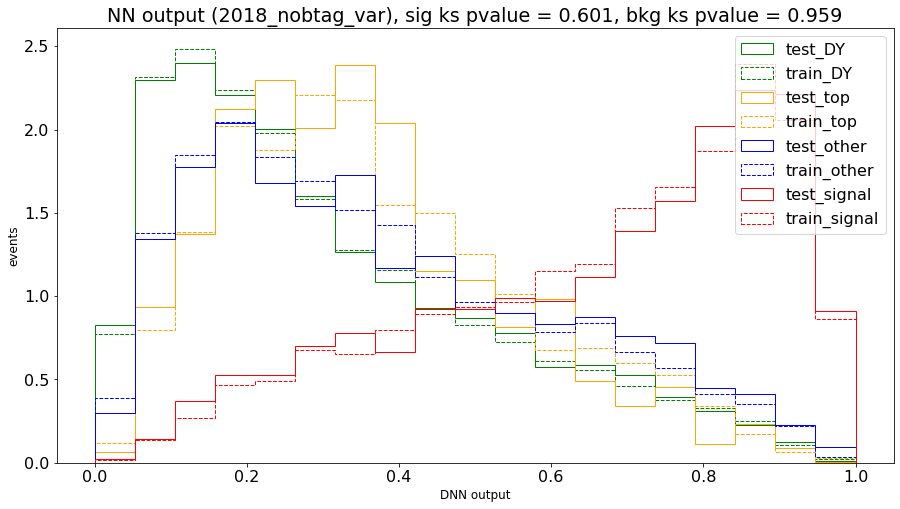

In [11]:
for yr in years:
    
    #plot NN ouput by sample
    plt.figure(figsize=(15,8))
    groups=['DY','top','other','signal'] #removed top for readability
    color=['green', 'orange','blue','red']
    x=[]
    nbins=20
    
    for i,group in enumerate(groups):  
        plt.hist(predictions_NN[(y_test['group']==group) & (y_test['year']==yr)],bins=np.linspace(0,1,nbins), label='test_'+group, density=True, histtype='step', color=color[i], weights= y_test['weight_'][(y_test['group']==group)& (y_test['year']==yr)])
        plt.hist(predictions_NN_train[(y_train['group']==group)& (y_train['year']==yr)],bins=np.linspace(0,1,nbins), label='train_'+group, density=True, histtype='step', color=color[i], linestyle='dashed',weights= y_train['weight_'][(y_train['group']==group) & (y_train['year']==yr)])

    plt.xlabel('DNN output',fontsize=12)
    plt.ylabel('events',fontsize=12)
    ks_test_sig=stats.ks_2samp(predictions_NN[:,0][(y_test['signal'] ==1) & (y_test['year']==yr)],predictions_NN_train[:,0][(y_train['signal']) ==1 & (y_train['year']==yr)])
    ks_test_bkg=stats.ks_2samp(predictions_NN[:,0][(y_test['signal'] ==0) & (y_test['year']==yr)],predictions_NN_train[:,0][(y_train['signal']) ==0 & (y_train['year']==yr)])

    plt.title('NN output ({}), sig ks pvalue = {:.3f}, bkg ks pvalue = {:.3f}'.format(yr,ks_test_sig[1], ks_test_bkg[1]))
    plt.legend()
    plt.savefig(res_dir+'\\{}{}_{}_NNOutput_Trainvstest_{}.png'.format(year,vers,cut,yr))


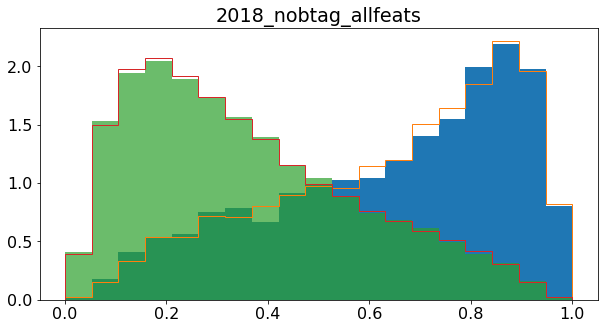

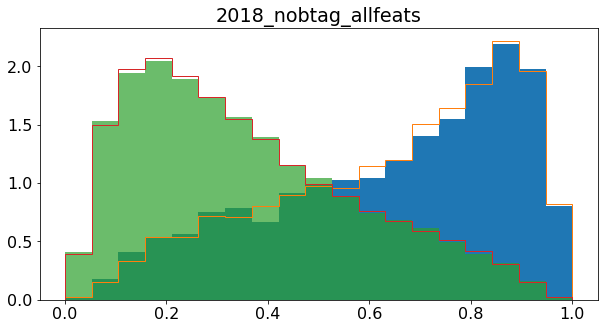

In [12]:
nbins = np.linspace(0,1,20)
plt.figure(figsize=(10,5))
plt.hist(predictions_NN[:,0][(y_test['signal'] ==1)], density = True, bins=nbins)
plt.hist(predictions_NN_train[:,0][(y_train['signal'] ==1)], histtype='step', density=True, bins=nbins)
plt.hist(predictions_NN[:,0][(y_test['signal'] ==0)], density = True, bins=nbins, alpha=0.7)
plt.hist(predictions_NN_train[:,0][(y_train['signal'] ==0)], histtype='step', density=True, bins=nbins)
plt.title(name)
for yr in years:
    plt.figure(figsize=(10,5))
    plt.hist(predictions_NN[:,0][(y_test['signal'] ==1) & (y_test['year']==yr)], density = True, bins=nbins)
    plt.hist(predictions_NN_train[:,0][(y_train['signal'] ==1) & (y_train['year']==yr)], histtype='step', density=True, bins=nbins)
    plt.hist(predictions_NN[:,0][(y_test['signal'] ==0) & (y_test['year']==yr)], density = True, bins=nbins, alpha = 0.7)
    plt.hist(predictions_NN_train[:,0][(y_train['signal'] ==0) & (y_train['year']==yr)], histtype='step', density=True, bins=nbins)
    plt.title(year)

In [13]:
import shap
# select a set of background examples to take an expectation over
background = X_train.to_numpy()[np.random.choice(X_train.shape[0], 1000, replace=False)]

# explain predictions of the model on four images
explainer = shap.DeepExplainer(model, background)

shap_values = explainer.shap_values(X_test.to_numpy())

# plot the feature attributions
#shap.image_plot(shap_values, -x_test[1:5])

keras is no longer supported, please use tf.keras instead.


In [14]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][3], input_list)

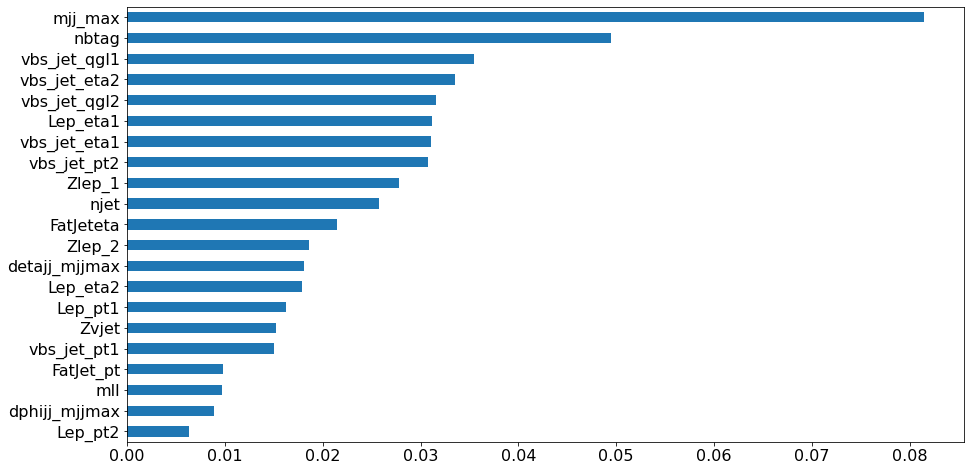

In [15]:

shap_df=pd.DataFrame(shap_values[0], columns=input_list)
shap_mean=[]
for column in shap_df.columns:
    shap_mean.append(np.abs(shap_df[column]).mean())
abs(shap_df).mean().sort_values().plot(kind='barh', figsize=(15,8))
plt.savefig(res_dir+'/importance.png')

TypeError: 'tuple' object is not callable

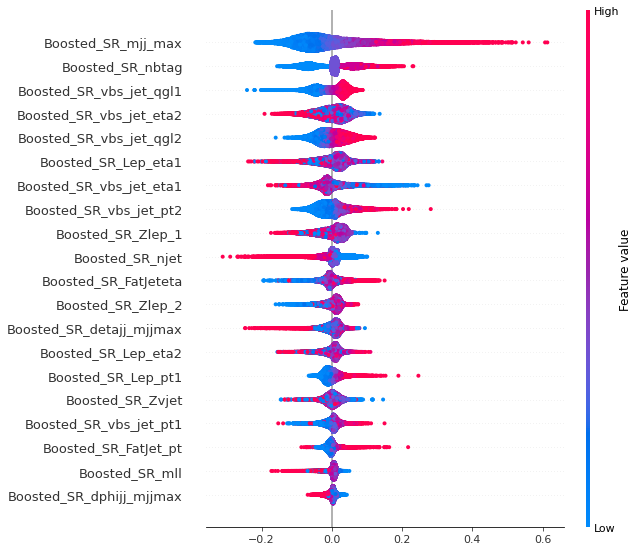

In [16]:
#I don't know why the plotting fails, it works in other notebooks

plt.figure(figsize=(10,5))
shap.summary_plot(shap_values[0], X_test, show = False)
plt.savefig(res_dir+'/importance_violin.png')


### 